### Importing Data and Libraries

In [ ]:
# Import Statements
import numpy as np # Linear algebra and pandas compatibility
import pandas as pd # Data management, and dataframes
from sklearn.model_selection import train_test_split # Splits dataset into training|testing sets
from sklearn.tree import DecisionTreeRegressor # Decision Tree Model
from sklearn.ensemble import RandomForestRegressor # Random Forest Model
from sklearn.metrics import mean_absolute_error # MAE, measuring loss
import matplotlib.pyplot as plt # Graphing library to visualize the data/correlations
import seaborn as sns #Heatmap
from yellowbrick.model_selection import FeatureImportances # Correlation finding
from sklearn.linear_model import LogisticRegression
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve


In [ ]:
# Importing our dataset: "Spotify dataset 1922-2021"
file_path = '/content/song_data.csv' # CSV file
df = pd.read_csv(file_path) # Creating our main dataframe named "df" using pd.read_csv

### Visualizing Our Data

In [ ]:
df.shape

(18835, 15)

In [ ]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


#### Looking for Obvious Trends

In [ ]:
Benchmark = df[['song_name','song_duration_ms','song_popularity', 'time_signature', 'speechiness']]
# The Benchmark is the "Popularity" index, as that is our label
Benchmark = Benchmark.sort_values(by=['song_popularity', 'song_name'], ascending=[False, True])
Benchmark.song_name = Benchmark.song_name.str.strip('[]').str.replace("'", "")
Benchmark.head(50)

,song_name,song_duration_ms,song_popularity,time_signature,speechiness
4299,Happier,214289,100,4,0.0452
5593,Happier,214289,100,4,0.0452
7568,Happier,214289,100,4,0.0452
7636,Happier,214289,100,4,0.0452
11665,Happier,214289,100,4,0.0452
11697,Happier,214289,100,4,0.0452
14176,Happier,214289,100,4,0.0452
15091,Happier,214289,100,4,0.0452
16497,Happier,214289,100,4,0.0452
17392,Happier,214289,100,4,0.0452


In [ ]:
# In the previous, it seems as though 2020 (newest) is favored. Is the opposite true for the oldest?
year = Benchmark.sort_values(by=['song_name', 'song_duration_ms'], ascending=[True, False])
year.head(10)

,song_name,song_duration_ms,song_popularity,time_signature,speechiness
16726,"""40"" - Live Version 1983",225440,1,4,0.0399
14132,"""45""",202493,48,4,0.1020
14990,"""99""",199413,67,4,0.0303
2198,"""Heroes"" - Single Version; 2014 Remastered Ver...",213813,58,4,0.0276
12160,#CaixaGang,208484,10,4,0.0920
16107,#SELFIE,183750,27,4,0.2330
11845,$$$ - with Matt Ox,130403,78,4,0.0650
16620,$orries,214857,62,4,0.0955
17572,& Down,258133,0,4,0.3300
12727,&burn (with Vince Staples),179015,28,4,0.2450


In [ ]:
# Perhaps this is biased, as the music from 1921 might actually be less popular. Let's use qualitative data to see if our hypothesis of new year = +popularity is true.
popularoldyear = df.loc[(df['song_popularity'] >= 50) & (df['song_popularity'] <= 2000)]
popularoldyear = popularoldyear.sort_values(by=['song_popularity', 'time_signature'], ascending=[False, True])
popularoldyear.head(20)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4299,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
5593,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
7568,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
7636,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11665,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
11697,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
14176,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
15091,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
16497,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671
17392,Happier,100,214289,0.1910,0.687,0.792,0.0,5,0.167,-2.749,1,0.0452,100.015,4,0.671


#### Now that we have a better idea as to how Spotify ranks the popularity of their music, we can start analyzing its correlation with other features on the Spotify API dataset.

<ipython-input-12-cbe06a03bbb3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='icefire');


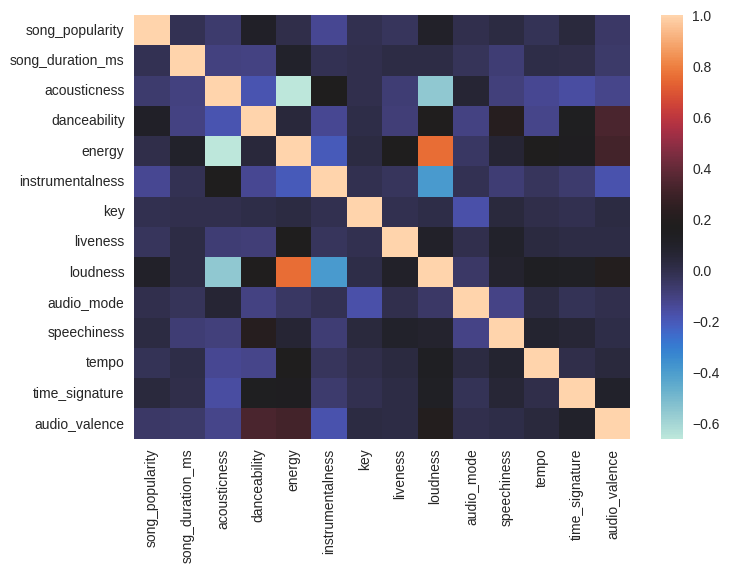

In [ ]:
# Creating a simple heatmap to see the correlation of our features to our labels
sns.heatmap(df.corr(), cmap='icefire');
# With this heatmap, we can decide which values are most valuable (usually the close to 1.0, the better)
# We can also decide which ones we might want to make synthetic features with.

Looking at this graph, there are a couple pairs which have great correlation:
- Year - Popularity (Positive)
- Loudness - Energy (Positive)
- Energy - Acousticness (Negative)
- Acousticness - Year (Negative)

##### The only ones of these pairs that could give us meaningful synthetic data are Loudness - Energy, and Energy - Acousticness as the first includes the label, and the last includes our main feature, "year".

Also, mode and key have very little correlation with any values, we can remove them.


In [ ]:
df.corr()['song_popularity'].sort_values(ascending=False) # Numerical values to prove hypotheses

<ipython-input-13-977e2d8a3b88>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['song_popularity'].sort_values(ascending=False) # Numerical values to prove hypotheses


song_popularity     1.000000
danceability        0.104290
loudness            0.099442
time_signature      0.034983
speechiness         0.021479
energy              0.001365
audio_mode         -0.004969
key                -0.013160
song_duration_ms   -0.018899
tempo              -0.022672
liveness           -0.038937
audio_valence      -0.052895
acousticness       -0.065181
instrumentalness   -0.130907
Name: song_popularity, dtype: float64

In [ ]:
df.corr()['energy'].sort_values(ascending=False)

<ipython-input-14-549517eecbbf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['energy'].sort_values(ascending=False)


energy              1.000000
loudness            0.755516
audio_valence       0.316742
liveness            0.167143
tempo               0.162448
time_signature      0.146265
song_duration_ms    0.092688
speechiness         0.062053
danceability        0.044373
key                 0.020416
song_popularity     0.001365
audio_mode         -0.051605
instrumentalness   -0.205914
acousticness       -0.662639
Name: energy, dtype: float64

<ipython-input-19-54b69f2ce3fa>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['song_popularity'], ax=axs[0], kde=False)


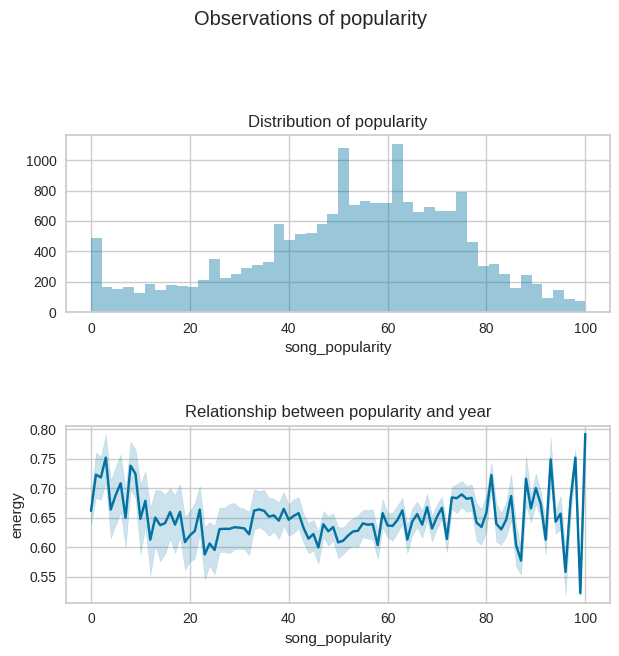

In [ ]:
# Analyzing our main feature
y = df.song_popularity

fig,axs = plt.subplots(2,1, figsize=(7,7))
fig.suptitle('Observations of popularity')

# Observe the distribution of 'popularity'axs[0].set_title('Distribution of popularity')
axs[0].set_title('Distribution of popularity')
sns.distplot(df['song_popularity'], ax=axs[0], kde=False)

axs[1].set_title('Relationship between popularity and year')
sns.lineplot(x='song_popularity', y='energy', data=df, ax=axs[1])

fig.tight_layout(pad=3.0)

In [ ]:
# Set the predictor variables
df["song_name"] = df["energy"] * df["song_duration_ms"]
df["acousticness"] = df['danceability'] * df['energy']
features = ['energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo',
        'time_signature', 'audio_valence']
# Removed 'mode' and 'key', as they had little/no correllation with popularity.
X = df[features]
X.head()

,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size= 0.2, random_state=0)

### Training, Testing, and Predicting

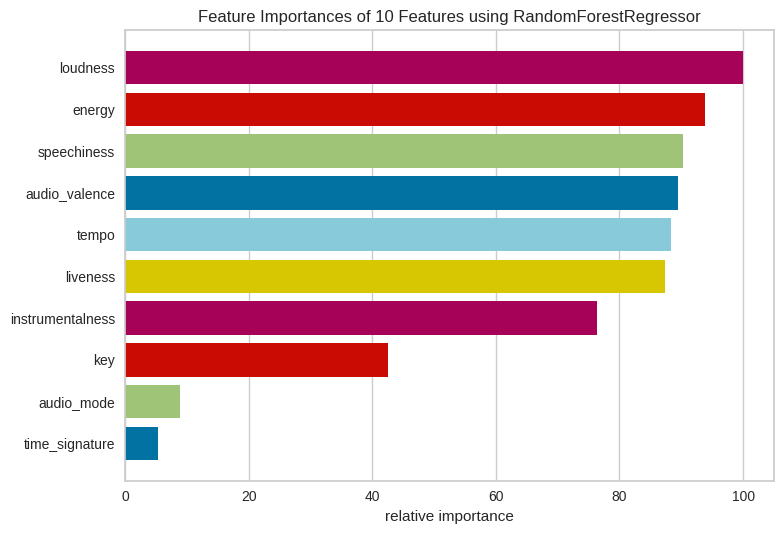

<Axes: title={'center': 'Feature Importances of 10 Features using RandomForestRegressor'}, xlabel='relative importance'>

In [ ]:
model = RandomForestRegressor()
viz = FeatureImportances(model)
viz.fit(train_X, train_y)
viz.show()
# Another correlation analysis, now using Machine Learning scripts to get a better understadning.

#### Comparing Models

In [ ]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(train_X,train_y)
val_preds1 = lr_model.predict(test_X)
val_mae1 = mean_absolute_error(test_y, val_preds1)
print(f'Mean absolute error of this model: {val_mae1:.3f}')

Mean absolute error of this model: 18.597


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(train_X, train_y)
val_preds1 = dec_tree.predict(test_X)
val_mae2 = mean_absolute_error(test_y, val_preds1)
print(f'Mean absolute error of this model: {val_mae2:.3f}')
# print(f'Training Coefficient of R^2 : {dec_tree.score(train_X, train_y):.2f}')
# print(f'Test Coefficient of R^2 : {dec_tree.score(test_X, test_y):.2f}')

Mean absolute error of this model: 15.733


In [ ]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(train_X, train_y)
val_preds1 = rf_model.predict(test_X)
val_mae3 = mean_absolute_error(test_y, val_preds1)
print(f'Mean absolute error of this model: {val_mae3:.3f}')
# Unfortunately, due to hardware limitaions, I couldn't include a validation curve to check for overfitting.

Mean absolute error of this model: 12.495


### Addressing a large problem in the dataset: The Year Bias

In [ ]:
df["song_name"] = df["energy"] * df["song_duration_ms"]
df["acousticness"] = df['danceability'] * df['energy']
features = ['energy', 'instrumentalness', 'key',
       'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo',
        'time_signature', 'audio_valence']
# Removed 'mode' and 'key', as they had little/no correllation with popularity.
X = df[features]
X.head()

,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size= 0.2, random_state=0)

In [ ]:
lr_model = LogisticRegression(random_state=0)
lr_model.fit(train_X,train_y)
val_preds1 = lr_model.predict(test_X)
val_mae4 = mean_absolute_error(test_y, val_preds1)
print(f'Mean absolute error of this model: {val_mae4:.3f}')

Mean absolute error of this model: 18.597


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
train_X.head()

,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
6589,0.942,0.0171,1,0.1190,-3.825,0,0.1980,135.015,4,0.2360
17663,0.327,0.0000,7,0.1150,-7.583,1,0.0326,114.072,4,0.0767
11847,0.527,0.0000,4,0.0976,-5.194,0,0.1110,129.964,4,0.1780
9370,0.907,0.0000,1,0.1470,-3.741,0,0.3490,170.008,4,0.4990
9840,0.743,0.0000,10,0.1130,-4.577,0,0.4310,146.234,4,0.5570


In [ ]:
dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(train_X, train_y)
val_preds1 = dec_tree.predict(test_X)
val_mae5 = mean_absolute_error(test_y, val_preds1)
print(f'Mean absolute error of this model: {val_mae5:.3f}')

Mean absolute error of this model: 15.733


In [ ]:
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(train_X, train_y)
val_preds1 = rf_model.predict(test_X)
val_mae3 = mean_absolute_error(test_y, val_preds1)
print(f'Mean absolute error of this model: {val_mae3:.3f}')
# Unfortunately, due to hardware limitaions, I couldn't include a validation curve to check for overfitting.

Mean absolute error of this model: 12.495


ValueError: ignored

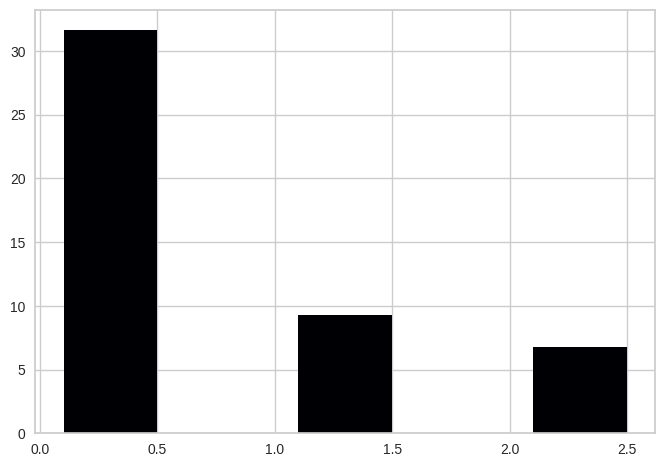

In [ ]:
data = [[ 31.641, 9.281,  6.753]]

columns = ('LogisticRegression', 'DecisionTree', 'RandomForest')
rows = ['%d Mean Absolute Error' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.magma(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()
# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')


# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()


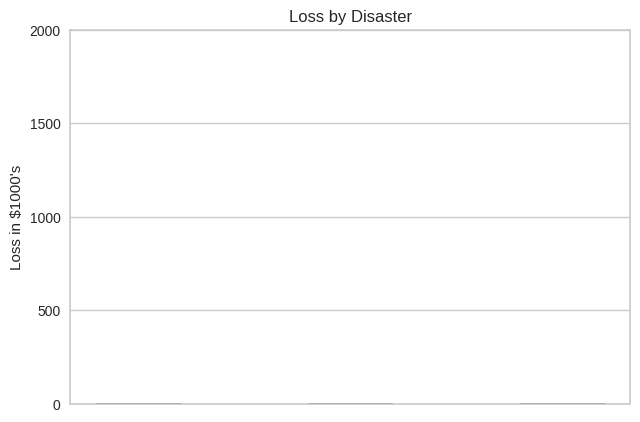

In [ ]:
data = [[ 31.634, 14.183, 10.441]]

columns = ('LogisticRegression', 'DecisionTree', 'RandomForest')
rows = ['%d Mean Absolute Error' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.magma(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
#the_table = plt.table(cellText=cell_text,
                      #rowLabels=rows,
                      #rowColours=colors,
                      #colLabels=columns,
                      #loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()